<a href="https://colab.research.google.com/github/jnnfrwht14/module21_deep_learning/blob/main/AlphabetSoupCharity_Optimization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.  FOURTH ATTEMPT
application_df = application_df.drop(columns= ['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS','ORGANIZATION'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,1,0,5000,1
1,T3,Independent,C2000,Preservation,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,1,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
value_count = application_df['APPLICATION_TYPE'].value_counts()
value_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(value_count.iloc[7:].index)
cutoff_value = 725

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >5
classreplace = class_count.loc[class_count > 5]
classreplace

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count.iloc[5:].index)
cutoff = 1883

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
application_df.head(7)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,1,0,5000,1
1,T3,Independent,C2000,Preservation,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,1,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,1,0,5000,1
6,T3,Independent,C1000,Preservation,1,100000-499999,31452,1


In [10]:
application_df.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
dumdum = pd.get_dummies(application_df)
dumdum.head(7)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,USE_CASE_ProductDev,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,5000,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,31452,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
# Split our preprocessed data into our features and target arrays
y = dumdum['IS_SUCCESSFUL'].values
x = dumdum.drop(columns= 'IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(x_train)

# Scale the data
X_train_scaled = X_scaler.transform(x_train)
X_test_scaled = X_scaler.transform(x_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(x_train[0])
hidden_node_L1 = 9
hidden_node_L2 = 5
hidden_node_L3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_node_L1, input_dim=number_input_features, activation='sigmoid')
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_node_L2, activation='sigmoid')
)

# THIRD hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_node_L3, activation='relu')
)
# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 333       
                                                                 
 dense_1 (Dense)             (None, 5)                 50        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 405 (1.58 KB)
Trainable params: 405 (1.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile the model version 1
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model version 1
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6328 - accuracy: 0.6686
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5775 - accuracy: 0.7219
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5738 - accuracy: 0.7228
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5714 - accuracy: 0.7229
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5694 - accuracy: 0.7234
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5677 - accuracy: 0.7250
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5667 - accuracy: 0.7257
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5660 - accuracy: 0.7252
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5655 - accuracy: 0.7257
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5647 - accura

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5587 - accuracy: 0.7293 - 537ms/epoch - 2ms/step
Loss: 0.5587390661239624, Accuracy: 0.7293294668197632


In [18]:
# Export our model to HDF5 file
filepath = r'C:\Users\jnnfr\OneDrive\Documents\Data Analytics\module21_neural_networks\challenge\module21_deep_learning\AlphabetSoupCharity.h5'
# nn.save(filepath, save_format= 'h5')
nn.save('AlphabetSoupCharity.keras')
# nn.save('AlphabetSoupCharity.keras').
#   nn.save_model(AlphabetSoupCharity.keras)

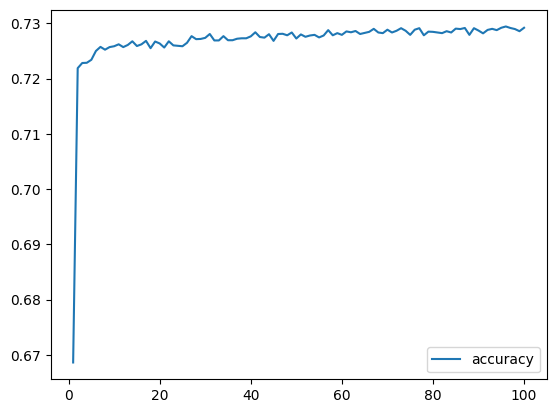

In [19]:
attempt_4_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))
attempt_4_df.plot(y='accuracy')
plt.show()

## Preprocessing

In [29]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [30]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'. FIFTH ATTEMPT
application_df = application_df.drop(columns= ['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS', 'ORGANIZATION', 'AFFILIATION'])
application_df.head()

,APPLICATION_TYPE,CLASSIFICATION,USE_CASE,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,C1000,ProductDev,1,0,5000,1
1,T3,C2000,Preservation,1,1-9999,108590,1
2,T5,C3000,ProductDev,1,0,5000,0
3,T3,C2000,Preservation,1,10000-24999,6692,1
4,T3,C1000,Heathcare,1,100000-499999,142590,1


In [31]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
CLASSIFICATION        71
USE_CASE               5
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [32]:
# Look at APPLICATION_TYPE value counts for binning
value_count = application_df['APPLICATION_TYPE'].value_counts()
value_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [33]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(value_count.iloc[8:].index)
cutoff_value = 528

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [34]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [35]:
# You may find it helpful to look at CLASSIFICATION value counts >3
classreplace = class_count.loc[class_count > 3]
classreplace

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
Name: CLASSIFICATION, dtype: int64

In [36]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count.iloc[5:].index)
cutoff = 1883

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [37]:
application_df.head(7)

,APPLICATION_TYPE,CLASSIFICATION,USE_CASE,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,C1000,ProductDev,1,0,5000,1
1,T3,C2000,Preservation,1,1-9999,108590,1
2,T5,C3000,ProductDev,1,0,5000,0
3,T3,C2000,Preservation,1,10000-24999,6692,1
4,T3,C1000,Heathcare,1,100000-499999,142590,1
5,T3,C1200,Preservation,1,0,5000,1
6,T3,C1000,Preservation,1,100000-499999,31452,1


In [38]:
application_df.dtypes

APPLICATION_TYPE    object
CLASSIFICATION      object
USE_CASE            object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [39]:
# Convert categorical data to numeric with `pd.get_dummies`
dumdum = pd.get_dummies(application_df)
dumdum.head(7)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_ProductDev,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,5000,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,31452,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
# Split our preprocessed data into our features and target arrays
y = dumdum['IS_SUCCESSFUL'].values
x = dumdum.drop(columns= 'IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [41]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(x_train)

# Scale the data
X_train_scaled = X_scaler.transform(x_train)
X_test_scaled = X_scaler.transform(x_test)

## Compile, Train and Evaluate the Model

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(x_train[0])
hidden_node_L1 = 6
hidden_node_L2 = 6
hidden_node_L3 = 6
hidden_node_L4 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_node_L1, input_dim=number_input_features, activation='relu')
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_node_L2, activation='relu')
)

# THIRD hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_node_L3, activation='sigmoid')
)

# fourth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_node_L4, activation='sigmoid')
)

# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 192       
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 325 (1.27 KB)
Trainable params: 325 (1.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Compile the model version 1
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
# Train the model version 1
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6875 - accuracy: 0.5584
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6499 - accuracy: 0.6195
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6392 - accuracy: 0.6238
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6368 - accuracy: 0.6253
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.6358 - accuracy: 0.6251
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6352 - accuracy: 0.6265
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6348 - accuracy: 0.6279
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6343 - accuracy: 0.6291
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6339 - accuracy: 0.6299
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6338 - accura

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6321 - accuracy: 0.6285 - 490ms/epoch - 2ms/step
Loss: 0.6321014761924744, Accuracy: 0.6284548044204712


In [ ]:
# Export our model to HDF5 file
filepath = r'C:\Users\jnnfr\OneDrive\Documents\Data Analytics\module21_neural_networks\challenge\module21_deep_learning\AlphabetSoupCharity.h5'
# nn.save(filepath, save_format= 'h5')
nn.save('AlphabetSoupCharity.keras')
# nn.save('AlphabetSoupCharity.keras').
#   nn.save_model(AlphabetSoupCharity.keras)

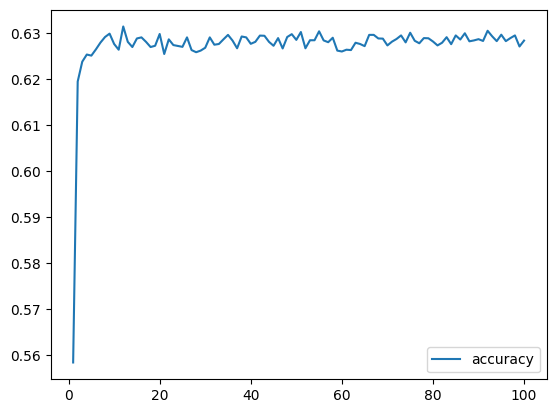

In [46]:
attempt_5_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))
attempt_5_df.plot(y='accuracy')
plt.show()